<a href="https://colab.research.google.com/github/tashfeenMustafa/KMeans-Clustering-Image-Audio-Text/blob/main/1821069_DataMining_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Image Data KMeans Clustering

##Running KMeans Algorithm on MNIST database of Handwritten digits.

Url: http://yann.lecun.com/exdb/mnist/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from mlxtend.data import loadlocal_mnist
from sklearn.cluster import KMeans
import numpy as np
import time

path = '/content/drive/MyDrive/Final_Project/mnist_dataset/'

os.chdir(path)

# loading train data sets of images. labels is not used
images, labels = loadlocal_mnist(
    images_path="train-images.idx3-ubyte",
    labels_path="train-labels.idx1-ubyte"
)

# images is a 784 by 60000 data matrix
print('Dimensions: %s x %s' % (images.shape[0], images.shape[1]))

# labels is a 1 by 60000 data matrix
print('Dimensions: {}'.format(labels.shape))

# K Clusters
K = 10

print('MNIST Data Kmeans Started: ')
start_time = time.time()

# Running KMeans on images 10 times and making 10 clusters
# Initialization of centroids are done randomly
kmeans = KMeans(n_clusters=K, init='random', n_init=K).fit(images)

print('MNIST Data Kmeans  Ended: ')
print("--- %s seconds ---" % (time.time() - start_time))

# the cluster centers or centroids
clusters = kmeans.cluster_centers_

# find which points in the sample belong to which cluster
cluster_affiliations = kmeans.predict(images)

print('Total Number of Clusters: ', len(clusters))
print('Clusters: ', clusters)

print('Total Number of points in all clusters: ', len(cluster_affiliations))
print('Cluster Affiliations: ', cluster_affiliations)

Dimensions: 60000 x 784
Dimensions: (60000,)
MNIST Data Kmeans Started: 
MNIST Data Kmeans  Ended: 
--- 128.65020990371704 seconds ---
Total Number of Clusters:  10
Clusters:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Total Number of points in all clusters:  60000
Cluster Affiliations:  [5 1 7 ... 5 0 3]


In [ ]:
from matplotlib import pyplot as plt

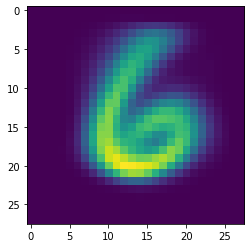

In [ ]:
im = clusters[0].reshape((28, 28))

plt.imshow(im)

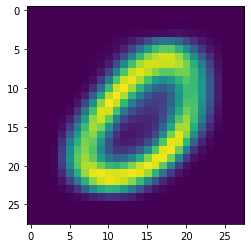

In [ ]:
im = clusters[1].reshape((28, 28))

plt.imshow(im)

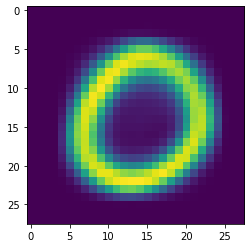

In [ ]:
im = clusters[2].reshape((28, 28))

plt.imshow(im)

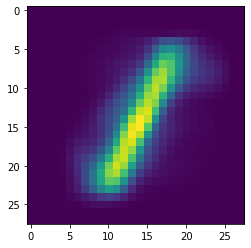

In [ ]:
im = clusters[3].reshape((28, 28))

plt.imshow(im)

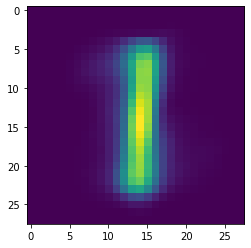

In [ ]:
im = clusters[4].reshape((28, 28))

plt.imshow(im)

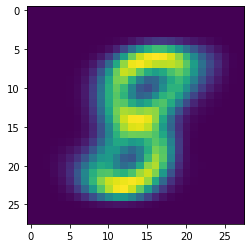

In [ ]:
im = clusters[5].reshape((28, 28))

plt.imshow(im)

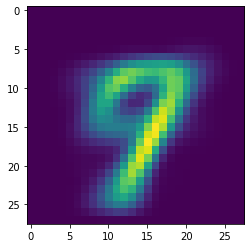

In [ ]:
im = clusters[6].reshape((28, 28))

plt.imshow(im)

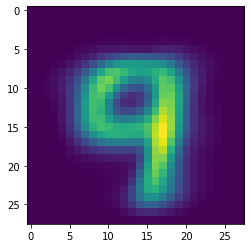

In [ ]:
im = clusters[7].reshape((28, 28))

plt.imshow(im)

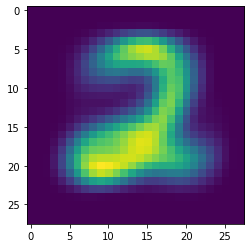

In [ ]:
im = clusters[8].reshape((28, 28))

plt.imshow(im)

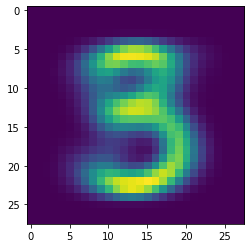

In [ ]:
im = clusters[9].reshape((28, 28))

plt.imshow(im)

## Checking quality of the final cluster using J
a) 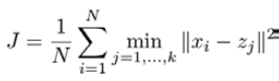

In [ ]:
# N = number of images
N = images.shape[0]

# initialize sum
sum = np.zeros(images.shape[1])

# x = image, z = clusters
for index, image in enumerate(images):
  sum += np.linalg.norm(image - clusters[cluster_affiliations[index]]) ** 2

# calculating J
J = sum / N

# check if all elements in J are same
good = np.all(J == J[0])
print(J)
if good:
  print('Quality Good!')

[2549875.41897524 2549875.41897524 2549875.41897524 2549875.41897524
 2549875.41897524 2549875.41897524 2549875.41897524 2549875.41897524
 2549875.41897524 2549875.41897524 2549875.41897524 2549875.41897524
 2549875.41897524 2549875.41897524 2549875.41897524 2549875.41897524
 2549875.41897524 2549875.41897524 2549875.41897524 2549875.41897524
 2549875.41897524 2549875.41897524 2549875.41897524 2549875.41897524
 2549875.41897524 2549875.41897524 2549875.41897524 2549875.41897524
 2549875.41897524 2549875.41897524 2549875.41897524 2549875.41897524
 2549875.41897524 2549875.41897524 2549875.41897524 2549875.41897524
 2549875.41897524 2549875.41897524 2549875.41897524 2549875.41897524
 2549875.41897524 2549875.41897524 2549875.41897524 2549875.41897524
 2549875.41897524 2549875.41897524 2549875.41897524 2549875.41897524
 2549875.41897524 2549875.41897524 2549875.41897524 2549875.41897524
 2549875.41897524 2549875.41897524 2549875.41897524 2549875.41897524
 2549875.41897524 2549875.41897524

## Checking quality of the final cluster using Davies–Bouldin index

b) Davies–Bouldin index
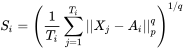

A lower Davies-Bouldin index relates to a model with better 
separation between the clusters. This index signifies the 
average ‘similarity’ between clusters, where the similarity 
is a measure that compares the distance between clusters with 
the size of the clusters themselves. Zero is the lowest possible 
score. Values closer to zero indicate a better partition.

Reference: sklearn documentation

In [ ]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(images, cluster_affiliations)
print('Davies Bouldin Index Score: {}'.format(db_score))

Davies Bouldin Index Score: 2.8373012643848625


## Checking quality of the final cluster using Dunn index
c) Dunn index

It is calculated as the lowest intercluster distance (ie. the smallest distance 
between any two cluster centroids) divided by the highest intracluster distance 
(ie. the largest distance between any two points in any cluster).
The higher the value of the Dunn index, the better the aggregation. 
The number of clusters which maximizes the Dunn index is considered to be the 
optimal number of clusters k. It also has some drawbacks. As the number of 
clusters and the dimensionality of the data increase, so does the cost of computation. 
(Reference: 
1. https://en.wikipedia.org/wiki/Dunn_index 
2. https://python.engineering/dunn-index-and-db-index-cluster-validity-indices-set-1/
3. https://mayankdw.medium.com/k-means-clustering-and-dunn-index-implementaion-from-scratch-9c66573bfe90)


In [ ]:
import math

# find euclidean distance between two points 
def find_distance(point, cluster_point):
    distance = math.sqrt(np.sum(np.power(np.subtract(point, cluster_point), 2))) 
    return distance

# find lowest intercluster distance
def get_lowest_intercluster_distance(clusters):
  min_intercluster_distance = float('inf')

  for index_1, cluster_1 in enumerate(clusters):
    for index_2, cluster_2 in enumerate(clusters):
      distance = float('inf')
      
      if index_1 == 0 and index_2 == 1:
        distance = find_distance(cluster_1, cluster_2)
        min_intercluster_distance = distance
      
      else:
        if np.any(cluster_1 != cluster_2):
          distance = find_distance(cluster_1, cluster_2)
      
        if distance < min_intercluster_distance:
          min_intercluster_distance = distance
    
    return min_intercluster_distance

# find highest intracluster distance
def get_highest_intracluster_distance(images):
  max_intracluster_distance = float('inf')

  for index_1, point_1 in enumerate(images):
    for index_2, point_2 in enumerate(images):
      distance = float('inf')
      
      if index_1 == 0 and index_2 == 1:
        distance = find_distance(point_1, point_2)
        max_intracluster_distance = distance
      
      else:
        if np.any(point_1 != point_2):
          distance = find_distance(point_1, point_2)
      
        if distance > max_intracluster_distance:
          max_intracluster_distance = distance
    
    return max_intracluster_distance

# find dunn index
def dunn_index(images, clusters):
  lowest_intercluster_distance = get_lowest_intercluster_distance(clusters)

  highest_intracluster_distance = get_highest_intracluster_distance(images)

  return lowest_intercluster_distance/highest_intracluster_distance

dunn_index_score = dunn_index(images, clusters)

# Print Dunn Index Score
print('Dunn Index Score: {}'.format(dunn_index_score))


Dunn Index Score: 6.783823761595991


# GITZAN Dataset Audio Data KMeans Clustering

## Calculating Filter Banks and MFCCs

In [ ]:
import os

In [ ]:
import numpy as np
import scipy.io.wavfile
from scipy.fftpack import dct
import scipy.signal as sps
from io import BytesIO

def reSampleSignal(sample_rate, signal):
  new_sample_rate = 1000

  # Resample data
  number_of_samples = round(len(signal) * float(new_sample_rate) / sample_rate)
  resampled_signal = sps.resample(signal, number_of_samples)
  return new_sample_rate, resampled_signal

def preEmphasis(signal):
  pre_emphasis = 0.90
  emphasized_signal = np.append(signal, signal[1:] - pre_emphasis * signal[:-1])
  return emphasized_signal

def framing(emphasized_signal, sample_rate):
  # in seconds
  frame_size = 0.050
  # in seconds
  frame_stride = 0.025

  # Converting seconds to samples
  frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate

  # Calculating the number of frames required
  signal_length = len(emphasized_signal)
  frame_length = int(round(frame_length))
  frame_step = int(round(frame_step))
  num_frames = int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))  # Make sure that we have at least 1 frame

  # Pad Signal to make sure that all frames have equal number of samples without truncating any samples from the original signal
  pad_signal_length = num_frames * frame_step + frame_length
  z = np.zeros((pad_signal_length - signal_length))
  pad_signal = np.append(emphasized_signal, z)

  # Create indices for frames and create the frames
  indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
  frames = pad_signal[indices.astype(np.int32, copy=False)]

  return frame_length, frames

def applyWindowFunction(frame_length, frames):
  frames *= np.hamming(frame_length)
  return frames

def fourierTransformAndPowerSpectrum(frames, NFFT):
  # compute power spectrum (periodogram)
  mag_frames = np.absolute(np.fft.rfft(frames, NFFT))  # Magnitude of the FFT
  pow_frames = ((1.0 / NFFT) * (mag_frames ** 2))  # Power Spectrum

  return mag_frames, pow_frames

def computeFilterBanks(sample_rate, NFFT, pow_frames):
  nfilt = 40

  low_freq_mel = 0
  high_freq_mel = (2595 * np.log10(1 + (sample_rate / 2) / 700))  # Convert Hz to Mel
  mel_points = np.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
  hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
  bin_ = np.floor((NFFT + 1) * hz_points / sample_rate)

  fbank = np.zeros((nfilt, int(np.floor(NFFT / 2 + 1))))

  for m in range(1, nfilt + 1):
      f_m_minus = int(bin_[m - 1])   # left
      f_m = int(bin_[m])             # center
      f_m_plus = int(bin_[m + 1])    # right

      for k in range(f_m_minus, f_m):
          fbank[m - 1, k] = (k - bin_[m - 1]) / (bin_[m] - bin_[m - 1])
      for k in range(f_m, f_m_plus):
          fbank[m - 1, k] = (bin_[m + 1] - k) / (bin_[m + 1] - bin_[m])

  filter_banks = np.dot(pow_frames, fbank.T)
  filter_banks = np.where(filter_banks == 0, np.finfo(float).eps, filter_banks)  # Numerical Stability
  filter_banks = 20 * np.log10(filter_banks)  # dB

  return filter_banks

def getMFCC(filter_banks):
  num_ceps = 39

  mfcc = dct(filter_banks, type=1, axis=1, norm='ortho')[:, 1: (num_ceps + 1)]  # Keep keeping all 39 cepstral coefficients
  return mfcc

def dataNormalization(mfcc, filter_banks):
  filter_banks -= (np.mean(filter_banks, axis=0) + 1e-8)
  mfcc -= (np.mean(mfcc, axis=0) + 1e-8)
  
  return mfcc, filter_banks

def getMFCCandFilterBanks(file_name):
  file_name = file_name
  sample_rate, signal = scipy.io.wavfile.read(file_name)

  NFFT = 512

  sample_rate, resampled_signal = reSampleSignal(sample_rate, signal)
  emphasized_signal = preEmphasis(resampled_signal)
  frame_length, frames = framing(emphasized_signal, sample_rate)
  
  frames = applyWindowFunction(frame_length, frames)
  print(frames.shape)

  mag_frames, pow_frames = fourierTransformAndPowerSpectrum(frames, NFFT)

  filter_banks = computeFilterBanks(sample_rate, NFFT, pow_frames)
  mfcc = getMFCC(filter_banks)
  mfcc, filter_banks = dataNormalization(mfcc, filter_banks)
  
  mfcc = np.concatenate(mfcc, axis=None)
  print(mfcc.shape)

  return mfcc, filter_banks

## Reading songs from each genre and creating feature vectors using mfcc for each of the song

In [ ]:
import os
from google.colab import drive

mfcc_feature_vectors = []

path = '/content/drive/MyDrive/gitzan_dataset/genres_original/'

folders = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
all_wav_files = []
count = 0

for folder in folders:
  os.chdir(path + folder)
  files_in_folder = os.listdir()
  files_in_folder = files_in_folder[:int(0.75 * len(files_in_folder))]

  for file in files_in_folder:
    all_wav_files.append(file)

    mfcc, filter_banks = getMFCCandFilterBanks(file)
    mfcc_feature_vectors.append(mfcc)

(2399, 50)
(93561,)
(2399, 50)
(93561,)
(2399, 50)
(93561,)
(2399, 50)
(93561,)
(2399, 50)
(93561,)
(2399, 50)
(93561,)
(2399, 50)
(93561,)
(2399, 50)
(93561,)
(2399, 50)
(93561,)
(2399, 50)
(93561,)
(2399, 50)
(93561,)
(2399, 50)
(93561,)
(2399, 50)
(93561,)
(2399, 50)
(93561,)
(2399, 50)
(93561,)
(2399, 50)
(93561,)
(2399, 50)
(93561,)
(2399, 50)
(93561,)
(2399, 50)
(93561,)
(2399, 50)
(93561,)
(2399, 50)
(93561,)
(2399, 50)
(93561,)
(2399, 50)
(93561,)
(2399, 50)
(93561,)
(2399, 50)
(93561,)
(2399, 50)
(93561,)
(2399, 50)
(93561,)
(2399, 50)
(93561,)
(2399, 50)
(93561,)
(2399, 50)
(93561,)
(2399, 50)
(93561,)
(2399, 50)
(93561,)
(2399, 50)
(93561,)
(2399, 50)
(93561,)
(2399, 50)
(93561,)
(2399, 50)
(93561,)


KeyboardInterrupt: ignored

## Padding the feature vectors to be of equal length

In [ ]:
length_of_longest_mfcc = max(map(len, mfcc_feature_vectors))
print(length_of_longest_mfcc)

for i in range(len(mfcc_feature_vectors)):
  length_of_current_mfcc = len(mfcc_feature_vectors[i])
  if length_of_current_mfcc < length_of_longest_mfcc:
    temp_new_feature_vector = np.append(mfcc_feature_vectors[i], np.zeros(length_of_longest_mfcc - length_of_current_mfcc))
    mfcc_feature_vectors[i] = temp_new_feature_vector

new_mfcc_feature_vectors = np.asarray(mfcc_feature_vectors)
print(new_mfcc_feature_vectors.shape)
print(new_mfcc_feature_vectors)

95550
(749, 95550)
[[ 34.13801102  32.75766565  34.60760039 ...   0.           0.
    0.        ]
 [ 70.67906221  16.93190667 -13.40626184 ...   0.           0.
    0.        ]
 [-28.53121065  23.67298302  20.81064331 ...   0.           0.
    0.        ]
 ...
 [ 86.73858112  46.64724625 -12.63693595 ...   0.           0.
    0.        ]
 [  1.342779    27.62547434  25.09087546 ...   0.           0.
    0.        ]
 [ 50.54159725   6.08130187 -13.106142   ...   0.           0.
    0.        ]]


## Performing KMeans Algorithm on each song

In [ ]:
# K Clusters
K = 10

print('GTZAN Data Kmeans Started: ')
start_time = time.time()

# Running KMeans on images 10 times and making 10 clusters
# Initialization of centroids are done randomly
kmeans = KMeans(n_clusters=K, init='random', n_init=K).fit(new_mfcc_feature_vectors)

print('GTZAN Data Kmeans  Ended: ')
print("--- %s seconds ---" % (time.time() - start_time))

# the cluster centers or centroids
clusters = kmeans.cluster_centers_

# find which points in the sample belong to which cluster
cluster_affiliations = kmeans.predict(new_mfcc_feature_vectors)

print('Labels: ', np.unique(kmeans.labels_))

print('Total Number of Clusters: ', len(clusters))
print('Clusters: ', clusters)

print('Total Number of points in all clusters: ', len(cluster_affiliations))
print('Cluster Affiliations: ', cluster_affiliations)

GTZAN Data Kmeans Started: 
GTZAN Data Kmeans  Ended: 
--- 25.91285800933838 seconds ---
Labels:  [0 1 2 3 4 5 6 7 8 9]
Total Number of Clusters:  10
Clusters:  [[ 3.56144068e+01  1.16242928e+01 -1.17797970e+01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-4.70487104e+00 -1.15069254e+00  2.15528022e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.19428498e+01  1.12917193e+01  4.61029877e+00 ... -2.37231706e-03
   5.21316664e-03 -5.67690468e-03]
 ...
 [ 3.52623435e+01 -4.78373268e+01  3.96571403e+01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.40983267e+02  1.04018516e+02  2.27589038e+01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.16548231e+01  2.59625128e+01 -2.34919167e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
Total Number of points in all clusters:  749
Cluster Affiliations:  [2 2 4 2 4 2 4 2 4 2 4 4 2 4 2 2 2 4 2 4 4 2 4 2 2 4 2 2 4 4 4 4 4 4 2 4 4
 2 4 4 2 4 2 4 2 2 2 2 2 4 4 2 2 4 4 4 4 4 4 4 4 2 2 4 4 4 2

## Checking quality of the final cluster using J
a) 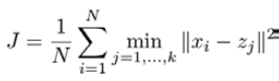

In [ ]:
# N = number of images
N = new_mfcc_feature_vectors.shape[0]

# initialize sum
sum = np.zeros(new_mfcc_feature_vectors.shape[1])

# x = new_mfcc_feature_vectors, z = clusters
for index, feature_vector in enumerate(new_mfcc_feature_vectors):
  sum += np.linalg.norm(feature_vector - clusters[cluster_affiliations[index]]) ** 2

# calculating J
J = sum / N

# check if all elements in J are same
good = np.all(J == J[0])

if good:
  print(J)
  print('Quality Good!')

[21252409.11518516 21252409.11518516 21252409.11518516 ...
 21252409.11518516 21252409.11518516 21252409.11518516]
Quality Good!


## Checking quality of the final cluster using Davies–Bouldin index

b) Davies–Bouldin index
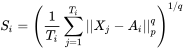

A lower Davies-Bouldin index relates to a model with better 
separation between the clusters. This index signifies the 
average ‘similarity’ between clusters, where the similarity 
is a measure that compares the distance between clusters with 
the size of the clusters themselves. Zero is the lowest possible 
score. Values closer to zero indicate a better partition.

Reference: sklearn documentation

In [ ]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(new_mfcc_feature_vectors, cluster_affiliations)
print('Davies Bouldin Index Score: {}'.format(db_score))

Davies Bouldin Index Score: 3.6501328457674624


## Checking quality of the final cluster using Dunn index
c) Dunn index

It is calculated as the lowest intercluster distance (ie. the smallest distance 
between any two cluster centroids) divided by the highest intracluster distance 
(ie. the largest distance between any two points in any cluster).
The higher the value of the Dunn index, the better the aggregation. 
The number of clusters which maximizes the Dunn index is considered to be the 
optimal number of clusters k. It also has some drawbacks. As the number of 
clusters and the dimensionality of the data increase, so does the cost of computation. 
(Reference: 
1. https://en.wikipedia.org/wiki/Dunn_index 
2. https://python.engineering/dunn-index-and-db-index-cluster-validity-indices-set-1/
3. https://mayankdw.medium.com/k-means-clustering-and-dunn-index-implementaion-from-scratch-9c66573bfe90)


In [ ]:
import math

# find euclidean distance between two points 
def find_distance(point, cluster_point):
    distance = math.sqrt(np.sum(np.power(np.subtract(point, cluster_point), 2))) 
    return distance

# find lowest intercluster distance
def get_lowest_intercluster_distance(clusters):
  min_intercluster_distance = float('inf')

  for index_1, cluster_1 in enumerate(clusters):
    for index_2, cluster_2 in enumerate(clusters):
      distance = float('inf')
      
      if index_1 == 0 and index_2 == 1:
        distance = find_distance(cluster_1, cluster_2)
        min_intercluster_distance = distance
      
      else:
        if np.any(cluster_1 != cluster_2):
          distance = find_distance(cluster_1, cluster_2)
      
        if distance < min_intercluster_distance:
          min_intercluster_distance = distance
    
    return min_intercluster_distance

# find highest intracluster distance
def get_highest_intracluster_distance(new_mfcc_feature_vectors):
  max_intracluster_distance = float('inf')

  for index_1, point_1 in enumerate(new_mfcc_feature_vectors):
    for index_2, point_2 in enumerate(new_mfcc_feature_vectors):
      distance = float('inf')
      
      if index_1 == 0 and index_2 == 1:
        distance = find_distance(point_1, point_2)
        max_intracluster_distance = distance
      
      else:
        if np.any(point_1 != point_2):
          distance = find_distance(point_1, point_2)
      
        if distance > max_intracluster_distance:
          max_intracluster_distance = distance
    
    return max_intracluster_distance

# find dunn index
def dunn_index(new_mfcc_feature_vectors, clusters):
  lowest_intercluster_distance = get_lowest_intercluster_distance(clusters)

  highest_intracluster_distance = get_highest_intracluster_distance(new_mfcc_feature_vectors)

  return lowest_intercluster_distance/highest_intracluster_distance

dunn_index_score = dunn_index(new_mfcc_feature_vectors, clusters)

# Print Dunn Index Score
print('Dunn Index Score: {}'.format(dunn_index_score))

Dunn Index Score: 0.3517043521897523


# Reddit Comments Text Data KMeans Clustering

## Getting the Reddit Comments Text Data and extracting relevant information

Dataset URL: https://www.kaggle.com/kaggle/reddit-comments-may-2015

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install langdetect

     |████████████████████████████████| 981 kB 12.3 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=2eb75be2056667f3ebaa2352636e2f870ffa2f202cccd54e3b37429784082a6d
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
import os
import sqlite3
import pandas as pd
from langdetect import detect
from google.colab import drive

query = 'Select rowid, parent_id, subreddit, body, author, score from May2015 LIMIT 39999;'
path = '/content/drive/MyDrive/reddit_comments_dataset/'

# go to path
os.chdir(path)

# Read sqlite query results into a pandas DataFrame
cursor = sqlite3.connect(path + 'database.sqlite')
dataframe = pd.read_sql_query(query, cursor)
cursor.close()

# Verify that result of SQL query is stored in the dataframe
reddit_dataset = dataframe.values.tolist()

# Extracting relevant data from dataset
comments = []
parents = []
subreddits = []

for index, data in enumerate(reddit_dataset[:10000]):
  parent_id = data[1]
  subreddit = data[2]
  body = data[3]
  language = None

  try:
    language = detect(body)
  except:
    language = 'error'

  if language == 'en':
    comments.append(body)
    parents.append(parent_id)
    subreddits.append(subreddit)

print(len(comments))

8206


## Import NLTK

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

## Perform Tokenization of each comment, removing Stopwords, Text Normalization and Stemming the Tokenized Comment List

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

porter_stemmer = PorterStemmer()

# get english stopwords
stop_words = list(stopwords.words('english'))

filtered_and_stemmed_comments = []

for comment in comments:
  # tokenizing the comments
  word_tokens = word_tokenize(comment)

  # filter out stopwords
  filtered_word_tokens = [w for w in word_tokens if not w in stop_words]
  
  # text normalization
  # removing punctuations
  filtered_word_tokens = [word for word in filtered_word_tokens if word.isalpha()]

  # make words lowercase
  filtered_word_tokens = [word.lower() for word in filtered_word_tokens]

  # performing stemming
  stemmed_word_tokens = []
  for filtered_word in filtered_word_tokens:
    stemmed_word = porter_stemmer.stem(filtered_word)
    stemmed_word_tokens.append(stemmed_word)

  # checking word count for each tokens 
  #word_count = Counter(stemmed_word_tokens)
  #print(word_count.most_common(10))

  filtered_and_stemmed_comments.append(stemmed_word_tokens)

len(filtered_and_stemmed_comments)

8206

In [ ]:
filtered_and_stemmed_comments

[['gg', 'one', 'watch', 'nfl', 'draft', 'i', 'guess'],
 ['are',
  'realli',
  'impli',
  'return',
  'time',
  'anywher',
  'near',
  'polit',
  'environ',
  'if',
  'wo',
  'much',
  'luck',
  'sell',
  'american',
  'peopl',
  'govern',
  'concept',
  'without',
  'usher',
  'american',
  'revolut'],
 ['no',
  'one',
  'european',
  'accent',
  'either',
  'exist',
  'there',
  'accent',
  'europ',
  'european',
  'accent'],
 ['that', 'kid', 'kevin', 'sad'],
 ['haha',
  'get',
  'nauseou',
  'ingam',
  'experi',
  'would',
  'given',
  'whole',
  'new',
  'level',
  'bloodborn'],
 ['after',
  'read',
  'i',
  'wholeheartedli',
  'believ',
  'let',
  'go',
  'you',
  'simpli',
  'compat',
  'she',
  'look',
  'committ',
  'bent',
  'avoid',
  'you',
  'figur',
  'committ',
  'issu',
  'get',
  'commit',
  'relationship'],
 ['let', 'see', 'guy', 'side'],
 ['you', 'buy', 'mysteri', 'sampler', 'small', 'batch', 'request'],
 ['nihilum',
  'lg',
  'significantli',
  'better',
  'theori',
 

## Build a term list with the tokens from each comment

In [ ]:
term_list = []

for tokens in filtered_and_stemmed_comments:
  for word in tokens:
    if word not in term_list:
      term_list.append(word)

print(term_list)

['gg', 'one', 'watch', 'nfl', 'draft', 'i', 'guess', 'are', 'realli', 'impli', 'return', 'time', 'anywher', 'near', 'polit', 'environ', 'if', 'wo', 'much', 'luck', 'sell', 'american', 'peopl', 'govern', 'concept', 'without', 'usher', 'revolut', 'no', 'european', 'accent', 'either', 'exist', 'there', 'europ', 'that', 'kid', 'kevin', 'sad', 'haha', 'get', 'nauseou', 'ingam', 'experi', 'would', 'given', 'whole', 'new', 'level', 'bloodborn', 'after', 'read', 'wholeheartedli', 'believ', 'let', 'go', 'you', 'simpli', 'compat', 'she', 'look', 'committ', 'bent', 'avoid', 'figur', 'issu', 'commit', 'relationship', 'see', 'guy', 'side', 'buy', 'mysteri', 'sampler', 'small', 'batch', 'request', 'nihilum', 'lg', 'significantli', 'better', 'theori', 'ca', 'think', 'replac', 'ptr', 'leav', 'clg', 'place', 'never', 'know', 'fuck', 'do', 'diss', 'grim', 'puncher', 'your', 'bar', 'seem', 'focu', 'introduc', 'rather', 'life', 'worth', 'live', 'understand', 'line', 'made', 'sens', 'theme', 'fear', 'remai

## Calculate TF matrix for a term in all comments/documents.

In [ ]:
import numpy as np

term_list_length = len(term_list)
#print(term_list_length)

# initialize feature vectors set
tf_matrix = np.zeros((len(comments), term_list_length), dtype=np.int64)

for index, document in enumerate(filtered_and_stemmed_comments):
  # initialize individual row vector of document
  row = [0] * term_list_length

  for word in document:
    # if word is in term list get the index and update row count in document
    if word in term_list:
      index_of_word_in_term_list = term_list.index(word)
      row[index_of_word_in_term_list] += 1

  row = np.asarray(row).astype(int)
  tf_matrix[index] = row

In [ ]:
tf_matrix = np.asarray(tf_matrix)

In [ ]:
tf_matrix.shape

(8206, 13043)

In [ ]:
tf_matrix[0]

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
tf_matrix

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Normalized TF Matrix

### Applying Sub-linear scaling

In [ ]:
import math 

for tf in tf_matrix:
  for t in tf:
    if t > 0:
      t = 1 - math.log(t)

In [ ]:
tf_matrix

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
tf_matrix.shape

(8206, 13043)

## Finding Document Frequency (DF)

In [ ]:
document_frequency = {}

# initializing df
for term in term_list:
  document_frequency[term] = 0

In [ ]:
len(document_frequency)

13043

In [ ]:
# fill up df

for i in range(term_list_length):
  max_term_frequency = max(tf_matrix[:, i])
  document_frequency[term_list[i]] = max_term_frequency


In [ ]:
document_frequency

{'gg': 4,
 'one': 6,
 'watch': 3,
 'nfl': 3,
 'draft': 4,
 'i': 33,
 'guess': 4,
 'are': 3,
 'realli': 6,
 'impli': 2,
 'return': 1,
 'time': 5,
 'anywher': 5,
 'near': 2,
 'polit': 3,
 'environ': 1,
 'if': 5,
 'wo': 2,
 'much': 5,
 'luck': 3,
 'sell': 3,
 'american': 4,
 'peopl': 14,
 'govern': 6,
 'concept': 2,
 'without': 4,
 'usher': 1,
 'revolut': 1,
 'no': 3,
 'european': 2,
 'accent': 3,
 'either': 2,
 'exist': 3,
 'there': 3,
 'europ': 2,
 'that': 4,
 'kid': 6,
 'kevin': 1,
 'sad': 1,
 'haha': 2,
 'get': 8,
 'nauseou': 1,
 'ingam': 1,
 'experi': 6,
 'would': 17,
 'given': 2,
 'whole': 3,
 'new': 11,
 'level': 10,
 'bloodborn': 1,
 'after': 2,
 'read': 5,
 'wholeheartedli': 1,
 'believ': 4,
 'let': 3,
 'go': 9,
 'you': 10,
 'simpli': 3,
 'compat': 1,
 'she': 5,
 'look': 4,
 'committ': 2,
 'bent': 1,
 'avoid': 2,
 'figur': 4,
 'issu': 3,
 'commit': 2,
 'relationship': 7,
 'see': 5,
 'guy': 6,
 'side': 2,
 'buy': 4,
 'mysteri': 1,
 'sampler': 1,
 'small': 2,
 'batch': 1,
 'request

## Finding IDF(t)

### Converting df to numpy array

In [ ]:
df_list = list(document_frequency.items())
df_array = np.asarray(df_list)
df_array = df_array[:, 1]
df_array = df_array.astype(np.float)

In [ ]:
df_array

array([4., 6., 3., ..., 1., 1., 1.])

### Finding IDF for each term

In [ ]:
idf = [] 

for i, term in enumerate(term_list):
  idf.append(1 + np.log(len(comments) / df_array[i]))

In [ ]:
idf = np.asarray(idf)

In [ ]:
idf.shape

(13043,)

In [ ]:
idf

array([ 8.62632651,  8.2208614 ,  8.91400858, ..., 10.01262087,
       10.01262087, 10.01262087])

## Combining TF-IDF

### Calculate final  weighted matrix for all documents

In [ ]:
weighted_matrix = tf_matrix 

for index_v, vector in enumerate(weighted_matrix):
  weighted_matrix[index_v] = weighted_matrix[index_v] * idf 

In [ ]:
weighted_matrix.shape

(8206, 13043)

In [ ]:
weighted_matrix

array([[ 8,  8,  8, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  8,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0, 10, 10],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

## Performing KMeans on Weighted Matrix of Text Data

In [ ]:
from sklearn.cluster import KMeans

# K Clusters
K = 5

print('Reddit Comments Data Kmeans Started: ')
start_time = time.time()

# Running KMeans on images 10 times and making 10 clusters
# Initialization of centroids are done randomly
kmeans = KMeans(n_clusters=K, init='random', n_init=K).fit(weighted_matrix)

print('Reddit Comments Data Kmeans Ended: ')
print("--- %s seconds ---" % (time.time() - start_time))

# the cluster centers or centroids
clusters = kmeans.cluster_centers_

# find which points in the sample belong to which cluster
cluster_affiliations = kmeans.predict(weighted_matrix)

print('Labels: ', np.unique(kmeans.labels_))

print('Total Number of Clusters: ', len(clusters))
print('Clusters: ', clusters)

print('Total Number of points in all clusters: ', len(cluster_affiliations))
print('Cluster Affiliations: ', cluster_affiliations)

Reddit Comments Data Kmeans Started: 
Reddit Comments Data Kmeans Ended: 
--- 13.76932978630066 seconds ---
Labels:  [0 1 2 3 4]
Total Number of Clusters:  5
Clusters:  [[ 4.95346743e-03  5.57190033e-01  1.25337736e-01 ...  1.50105074e-03
   1.50105074e-03  1.50105074e-03]
 [ 2.00000000e+00  2.00000000e+01  6.50000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.04000000e+01  3.30000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.43204578e-02  1.72961373e+00  3.56223176e-01 ... -1.47451495e-17
  -1.47451495e-17 -1.47451495e-17]
 [ 6.06060606e-02  4.73484848e+00  4.92424242e-01 ...  2.16840434e-19
   2.16840434e-19  2.16840434e-19]]
Total Number of points in all clusters:  8206
Cluster Affiliations:  [0 0 0 ... 0 0 0]


## Checking quality of the final cluster using J
a) 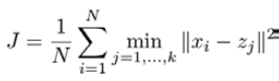

In [ ]:
# N = number of images
N = weighted_matrix.shape[0]

# initialize sum
sum = np.zeros(weighted_matrix.shape[1])

# x = new_mfcc_feature_vectors, z = clusters
for index, feature_vector in enumerate(weighted_matrix):
  sum += np.linalg.norm(feature_vector - clusters[cluster_affiliations[index]]) ** 2

# calculating J
J = sum / N

# check if all elements in J are same
good = np.all(J == J[0])

if good:
  print(J)
  print('Quality Good!')

[1643.03590041 1643.03590041 1643.03590041 ... 1643.03590041 1643.03590041
 1643.03590041]
Quality Good!


## Checking quality of the final cluster using Davies–Bouldin index

b) Davies–Bouldin index
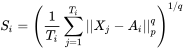

A lower Davies-Bouldin index relates to a model with better 
separation between the clusters. This index signifies the 
average ‘similarity’ between clusters, where the similarity 
is a measure that compares the distance between clusters with 
the size of the clusters themselves. Zero is the lowest possible 
score. Values closer to zero indicate a better partition.

Reference: sklearn documentation

In [ ]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(weighted_matrix, cluster_affiliations)
print('Davies Bouldin Index Score: {}'.format(db_score))

Davies Bouldin Index Score: 3.263774037968939


## Checking quality of the final cluster using Dunn index
c) Dunn index

It is calculated as the lowest intercluster distance (ie. the smallest distance 
between any two cluster centroids) divided by the highest intracluster distance 
(ie. the largest distance between any two points in any cluster).
The higher the value of the Dunn index, the better the aggregation. 
The number of clusters which maximizes the Dunn index is considered to be the 
optimal number of clusters k. It also has some drawbacks. As the number of 
clusters and the dimensionality of the data increase, so does the cost of computation. 
(Reference: 
1. https://en.wikipedia.org/wiki/Dunn_index 
2. https://python.engineering/dunn-index-and-db-index-cluster-validity-indices-set-1/
3. https://mayankdw.medium.com/k-means-clustering-and-dunn-index-implementaion-from-scratch-9c66573bfe90)


In [ ]:
import math

# find euclidean distance between two points 
def find_distance(point, cluster_point):
    distance = math.sqrt(np.sum(np.power(np.subtract(point, cluster_point), 2))) 
    return distance

# find lowest intercluster distance
def get_lowest_intercluster_distance(clusters):
  min_intercluster_distance = float('inf')

  for index_1, cluster_1 in enumerate(clusters):
    for index_2, cluster_2 in enumerate(clusters):
      distance = float('inf')
      
      if index_1 == 0 and index_2 == 1:
        distance = find_distance(cluster_1, cluster_2)
        min_intercluster_distance = distance
      
      else:
        if np.any(cluster_1 != cluster_2):
          distance = find_distance(cluster_1, cluster_2)
      
        if distance < min_intercluster_distance:
          min_intercluster_distance = distance
    
    return min_intercluster_distance

# find highest intracluster distance
def get_highest_intracluster_distance(new_mfcc_feature_vectors):
  max_intracluster_distance = float('inf')

  for index_1, point_1 in enumerate(new_mfcc_feature_vectors):
    for index_2, point_2 in enumerate(new_mfcc_feature_vectors):
      distance = float('inf')
      
      if index_1 == 0 and index_2 == 1:
        distance = find_distance(point_1, point_2)
        max_intracluster_distance = distance
      
      else:
        if np.any(point_1 != point_2):
          distance = find_distance(point_1, point_2)
      
        if distance > max_intracluster_distance:
          max_intracluster_distance = distance
    
    return max_intracluster_distance

# find dunn index
def dunn_index(new_mfcc_feature_vectors, clusters):
  lowest_intercluster_distance = get_lowest_intercluster_distance(clusters)

  highest_intracluster_distance = get_highest_intracluster_distance(new_mfcc_feature_vectors)

  return lowest_intercluster_distance/highest_intracluster_distance

dunn_index_score = dunn_index(weighted_matrix, clusters)

# Print Dunn Index Score
print('Dunn Index Score: {}'.format(dunn_index_score))

Dunn Index Score: 0.024840163615383264
